# 3:Qubits and State

### Welcome to the Quantum Computing club!

Do you prefer a bit, qubit, or a circuit gate?  
   
Anything you need can be catered for, just give the bartender a shout and he'll bring you a fantastic margarita.  

Ok, I know you are not thirsty, but I insist you try a margarita, at least if you can't read the back of the post you can say you're drunk.

#### *3.1 Qubits*
What is qubit?  

Nice question, before we step into this area, I will have a brief explaining about the conception of ***bit***.  

In classical computation, the basic unit of information is the ***bit***. Every bit can have a states, either 0 or 1. This is also called the ***Binary System***. And our daily computings are all depending on this system. Such as the phone you use, the TV you watch, the music you listen to, all about ***bits***.

But with the development of quantum computer, we have to find another unit which can be the basic unit of quantum information. So, we create the ***quantum bits***, or ***qubits*** for short. Absolutely, there are ***mathematics object***.  

"Wait a minute," you may be a little bit confused, "quantum bit should be a physics object." Well, you are right. Indeed, quantum bit or qubit is a physics object; we will talk about this later, and explain the relation between physics object and abstract mathematics. So, till now, you only need to know that qubit is a mathmatics object.  

Just like the bits, qubits also have a state. Two possible states for a qubit are $|0>$ and $|1>$. Pretty easy, right? The only difference of notation between qubit and bit is $|>$. What is that? This notation called ***Dirac notation***, it is the standard notation in qunatum computing, we will see this notation frequently, so say "hi" to it, be gentle.  

But what is the real difference? The truth is, qubits can be described as the combination of two states, which means a qubit can be other in $|0>$ or $|1>$. So, a qubit can be written as the ***linear combinations*** of states, often called ***superposition***.
$$|\psi> = \alpha|0> + \beta|1>$$  


Absolutely, $\alpha$ and $\beta$ here are complex number. We are trying to avoid complex number, but it seems not work. The state of a qubit is a vector in a two-dimensional complex vector space. The special states $|0>$ and $|1>$ are known as computational basis states, and form an orthonormal basis for this vector space.  

For a qubit, we can have the probability on either $|0>$ or $|1>$ by measuring it. The change during measurement, we called collapse(the wave function). And we can get result 1 with probability $|\alpha|^2$ or 0 with probability $|\beta|^2$.

Naturally, the probability needs to be summed up to one. So we get the formula below:
$$|\alpha|^2 + |\beta|^2 = 1$$

And we can use ***Bloch sphere*** to visualize the state of a single qubit, which is also a wonderful testbed of quantum computing and quantum information.

Statevector([-0.05033148-0.5326613j ,  0.26365734+0.80263534j],
            dims=(2,))


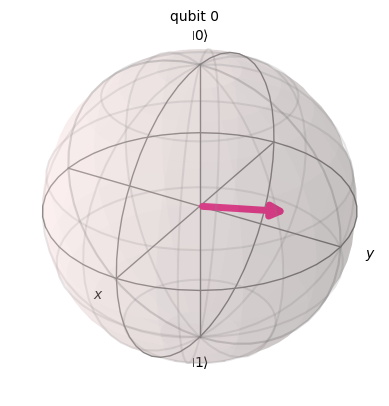

In [1]:
import qiskit.visualization as qv
import qiskit.quantum_info as qq
state = qq.random_statevector(2) #create a random single qubit
print(state)
qv.plot_bloch_multivector(state) #drew the Bloch sphere